In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv(r"C:\Users\conta\OneDrive\Desktop\powerbi\Telco Customer Churn\archive\WA_Fn-UseC_-Telco-Customer-Churn.csv")  # Update path if needed

In [4]:
print(df.info())
print(df.isnull().sum())
print(df['Churn'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\conta\AppData\Local\Temp\ipykernel_9112\2840544469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


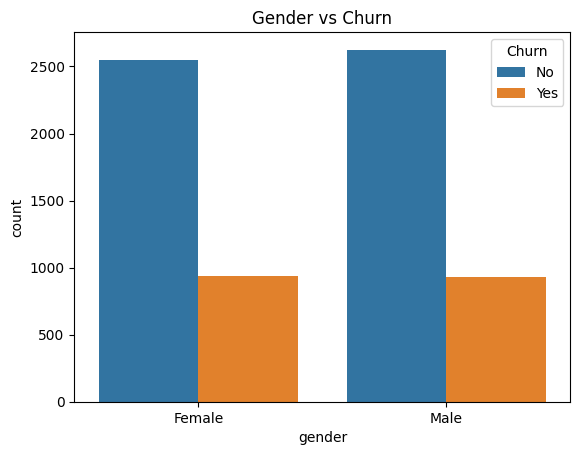

In [7]:
sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Gender vs Churn')
plt.show()

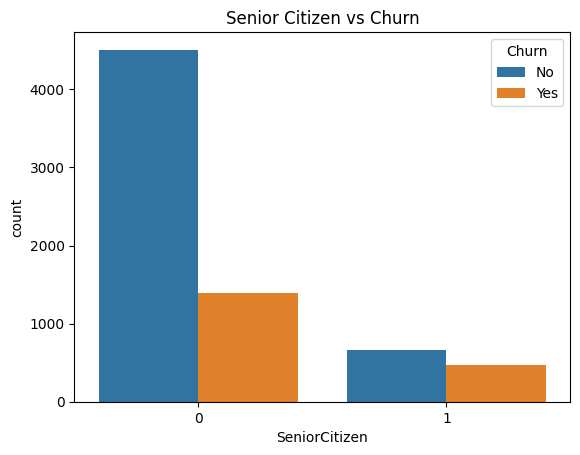

In [8]:
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.title('Senior Citizen vs Churn')
plt.show()


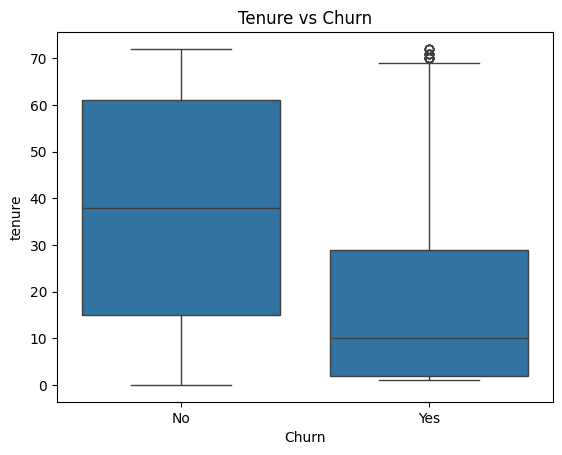

In [9]:
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure vs Churn')
plt.show()

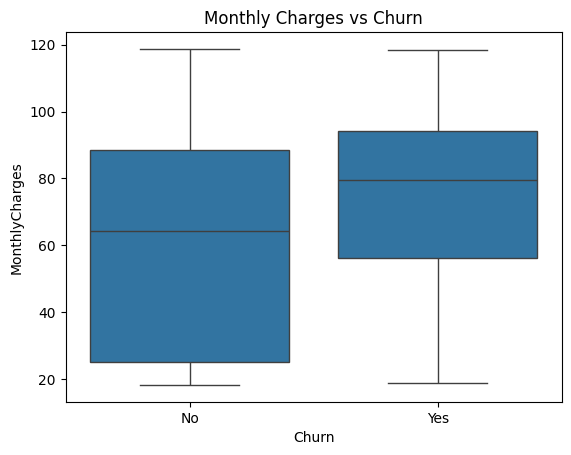

In [10]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges vs Churn')
plt.show()

In [11]:
df.drop('customerID', axis=1, inplace=True)

In [13]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    if col != 'Churn':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [14]:

df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [15]:
scaler = StandardScaler()
features = df.drop('Churn', axis=1)
X_scaled = scaler.fit_transform(features)

In [16]:
X = X_scaled
y = df['Churn']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



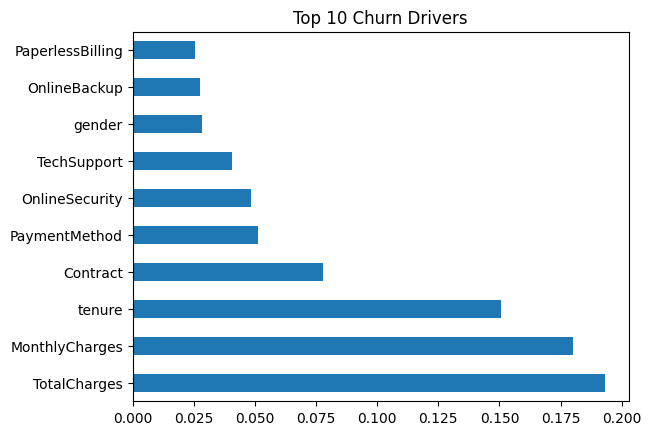

In [19]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=features.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Churn Drivers")
plt.show()

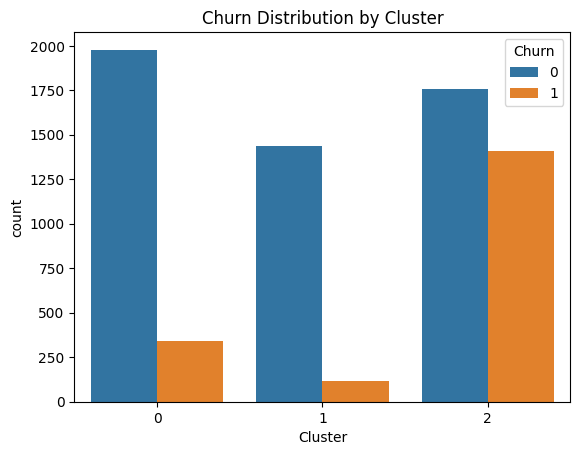

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
sns.countplot(data=df, x='Cluster', hue='Churn')
plt.title("Churn Distribution by Cluster")
plt.show()

In [21]:
print("Top 3 Drivers (based on Random Forest):")
print(feature_importances.nlargest(3))

print("\nSuggested Strategies:")
print("1. Focus on customers with month-to-month contracts — offer discounts or loyalty plans.")
print("2. Provide better tech support and services to Fiber optic users.")
print("3. Target new customers early (tenure < 6 months) with personalized offers.")

print("\nTarget Segment:")
print("Cluster with highest churn rate — analyze and prioritize outreach.")


Top 3 Drivers (based on Random Forest):
TotalCharges      0.193241
MonthlyCharges    0.180296
tenure            0.150683
dtype: float64

Suggested Strategies:
1. Focus on customers with month-to-month contracts — offer discounts or loyalty plans.
2. Provide better tech support and services to Fiber optic users.
3. Target new customers early (tenure < 6 months) with personalized offers.

Target Segment:
Cluster with highest churn rate — analyze and prioritize outreach.
